In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [1]:
import math

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
#from qiskit.backends.ibmq import least_busy

# useful additional packages 
#from qiskit.wrapper.jupyter import *
from qiskit.tools.visualization import plot_histogram

In [36]:
IBMQ.load_accounts()

In [7]:
def input_state(circ, q, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
        circ.u1(math.pi/float(2**(j)), q[j]).inverse()

In [20]:
def input_state(circ, q, n):

SyntaxError: invalid syntax (<ipython-input-20-dde9eefcd3f6>, line 1)

In [2]:
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cu1(math.pi/float(2**(j-k)), q[j], q[k])
        circ.h(q[j])

In [3]:
q = QuantumRegister(3)

#c = ClassicalRegister(3)
qft3 = QuantumCircuit(q)
qft3.x(q[1])
#input_state(qft3, q, 3)
qft(qft3, q, 3)
#for i in range(3):
 #   qft3.measure(q[i], c[i])
#print(qft3.qasm())

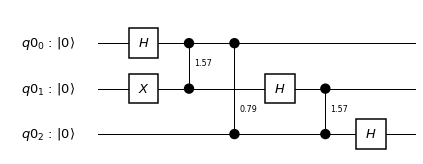

In [4]:
qft3.draw()

In [5]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(qft3, simulator).result()
unitary = result.get_unitary(qft3)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j        ]
 [ 0.        +0.35355339j  0.        -0.35355339j  0.35355339+0.j
  -0.35355339+0.j         -0.25      +0.25j        0.25      -0.25j
   0.25      +0.25j       -0.25      -0.25j      ]
 [-0.35355339+0.j         -0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.        -0.35355339j  0.        -0.35355339j
   0.        +0.35355339j  0.        +0.35355339j]
 [ 0.        -0.35355339j  0.        +0.35355339j  0.35355339+0.j
  -0.35355339+0.j          0.25      +0.25j       -0.25      -0.25j
  -0.25      +0.25j        0.25      -0.25j      ]
 [ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j         -0.35355339+0.j         -0.35355339+0.j
  -0.35355339+0.j         -0.35355339+0.j        ]
 [ 0.        +0.35355339j  0.        -0.35355339j  0.35

In [12]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(qft3, backend)
result = job.result()
outputstate = result.get_statevector(qft3, decimals=3)
print(outputstate)

[ 0.354+0.j     0.   +0.354j -0.354+0.j     0.   -0.354j  0.354+0.j
  0.   +0.354j -0.354+0.j     0.   -0.354j]


In [7]:
# run on local simulator
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qft3, backend=backend, shots=1024).result()
simulate.get_counts()

No classical registers in circuit "circuit0": result data will not contain counts.
No measurements in circuit "circuit0": count data will return all zeros.


QiskitError: 'No counts for experiment "None"'

In [ ]:
%%qiskit_job_status

# Use the IBM Quantum Experience
backend = least_busy(IBMQ.backends(simulator=False))
shots = 1024

job_exp = execute(qft3, backend=backend, shots=shots)

In [ ]:
results = job_exp.result()
plot_histogram(results.get_counts())

In [13]:
from qiskit.aqua.components.iqfts import Standard

In [15]:
Standard(3)

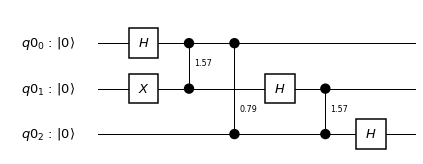

In [14]:
qft3.draw()

In [43]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.iden(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])



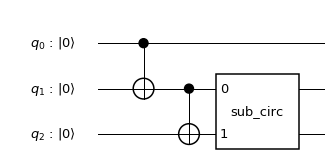

In [47]:
# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)
#circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [q[1], q[2]])

circ.draw(output='mpl')

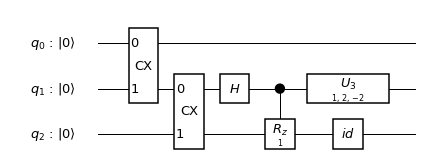

In [48]:
decomposed_circ = circ.decompose() # Doesn't modify original
decomposed_circ.draw(output='mpl')


In [46]:
sub_inst.inverse()

In [49]:
from qiskit.circuit import CompositeGate
from qiskit.circuit import Gate
from qiskit.circuit import QuantumCircuit
from qiskit.circuit import QuantumRegister
from qiskit.extensions.standard.u1 import U1Gate